In [185]:
import keras
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models

## Exploring the data

Q1.Import the cifar10 dataset from 'keras datasets' perform all the data preprocessing required

In [186]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

# Train-Test split

In [187]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [188]:
x_train.shape

(50000, 32, 32, 3)

In [189]:
y_train.shape

(50000, 1)

In [190]:
x_test.shape

(10000, 32, 32, 3)

In [191]:
y_test.shape

(10000, 1)

# Data preprocessing(Q1)

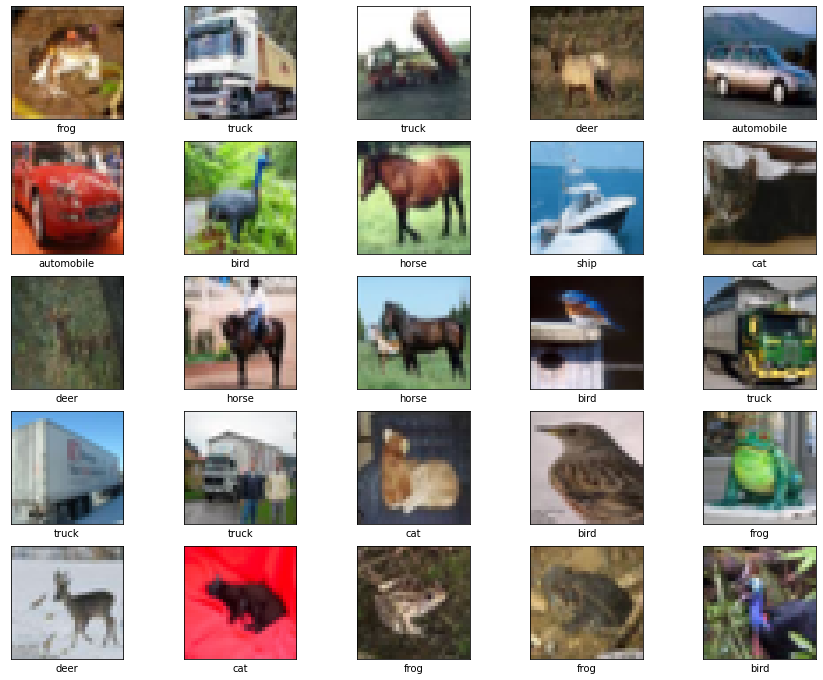

In [192]:
# Visulaize the Image
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(15, 12))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

  plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [193]:
x_train[0] #RGB values are stored from range 0-255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Distribution of Train-Test 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


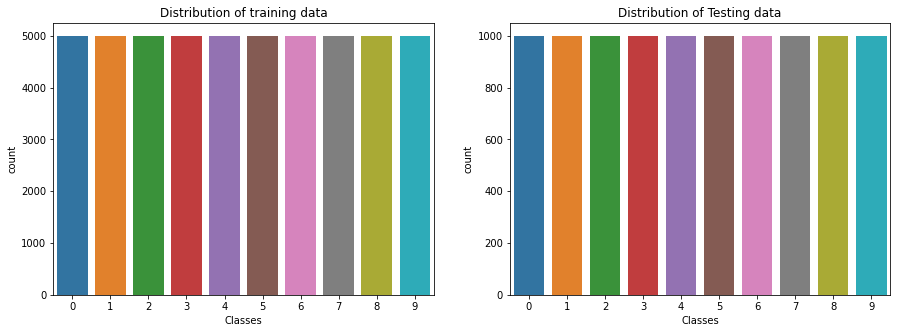

In [194]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [195]:
# Normalize the data

x_train, x_test = x_train/255.0, x_test/255.0

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Build simple artificial neural network for image classification

  Q2.Build a CNN architecture with keras and stack an ANN on top of CNN

In [196]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), #1st layer, accepts shape of 32*32*3
        layers.Dense(3000, activation='relu'),  #Deep layers with 3000 nurons
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  #last layer with 10 categories, as we have to predict 10 categories  
    ])



In [197]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', #we have values like(0-9)in y 
              metrics=['accuracy'])

In [198]:
num_epochs = 6
history = ann.fit(x_train,y_train,epochs=num_epochs, batch_size=5, validation_split=0.2, verbose=0)
history_dict = history.history

In [199]:
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2021 - accuracy: 0.5764
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1638 - accuracy: 0.5903
Epoch 3/5
1563/1563 [==============================] - 5s 4ms/step - loss: 1.1365 - accuracy: 0.5999
Epoch 4/5
1563/1563 [==============================] - 5s 4ms/step - loss: 1.1115 - accuracy: 0.6090
Epoch 5/5
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0888 - accuracy: 0.6167


You can see that at the end of 5 epochs, accuracy is at around 62%

Q3.Fit and evaluate the model.plot the training and validation curves

Text(0.5, 0, 'Epochs')

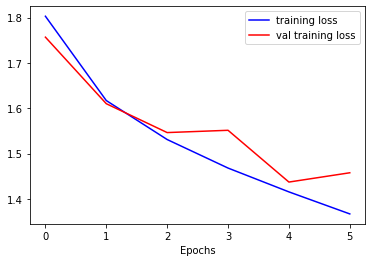

In [200]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

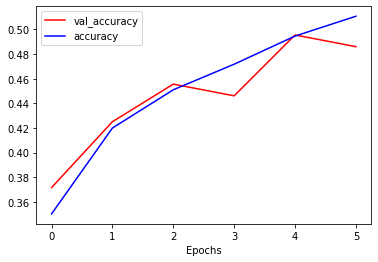

In [201]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [202]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.64      0.61      1000
           1       0.69      0.65      0.67      1000
           2       0.40      0.49      0.44      1000
           3       0.40      0.32      0.36      1000
           4       0.47      0.47      0.47      1000
           5       0.43      0.45      0.44      1000
           6       0.55      0.64      0.59      1000
           7       0.71      0.52      0.60      1000
           8       0.64      0.70      0.67      1000
           9       0.62      0.57      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



## Image Classification Using convolutional Neural Network

Q2.Build a CNN architecture with keras and stack an ANN on top of CNN

In [203]:
# One Hot Reprtesentation of labels

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [204]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [205]:
model = Sequential()


# 1st Convolution Block
model.add(Conv2D(filters = 64, kernel_size=(3, 3), input_shape = (32, 32, 3), activation = 'relu')) #1st Conv Layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #2nd Conv Layer

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))


# 2nd Convolution Block
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #3rd Conv Layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #4th Conv Layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))  #5th Conv Layer

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))


# Flattening Layer
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(64, activation = 'relu'))   # Hidden Layer 1
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))   # Hidden Layer 2
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))  # Output Layer

In [206]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 64)          36928     
                                                     

In [207]:
# Compile the Model

model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [208]:
# Train the Model

history = model.fit(x_train, y_train, epochs = 20, batch_size = 256, validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 6s 32ms/step - loss: 2.1319 - accuracy: 0.1878 - val_loss: 1.8001 - val_accuracy: 0.3389
Epoch 2/20
157/157 [==============================] - 5s 29ms/step - loss: 1.7978 - accuracy: 0.3246 - val_loss: 1.6189 - val_accuracy: 0.4108
Epoch 3/20
157/157 [==============================] - 5s 29ms/step - loss: 1.6164 - accuracy: 0.4022 - val_loss: 1.3938 - val_accuracy: 0.4888
Epoch 4/20
157/157 [==============================] - 4s 29ms/step - loss: 1.4980 - accuracy: 0.4514 - val_loss: 1.2874 - val_accuracy: 0.5292
Epoch 5/20
157/157 [==============================] - 5s 29ms/step - loss: 1.3946 - accuracy: 0.4929 - val_loss: 1.2243 - val_accuracy: 0.5697
Epoch 6/20
157/157 [==============================] - 5s 29ms/step - loss: 1.3126 - accuracy: 0.5261 - val_loss: 1.1225 - val_accuracy: 0.6010
Epoch 7/20
157/157 [==============================] - 5s 30ms/step - loss: 1.2594 - accuracy: 0.5490 - val_loss: 1.0930 - val_accuracy: 0.6172

Q3.Fit and evaluate the model.plot the training and validation curves

In [209]:
# Evaluate the Model

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8649 - accuracy: 0.7088


[0.864896297454834, 0.7088000178337097]

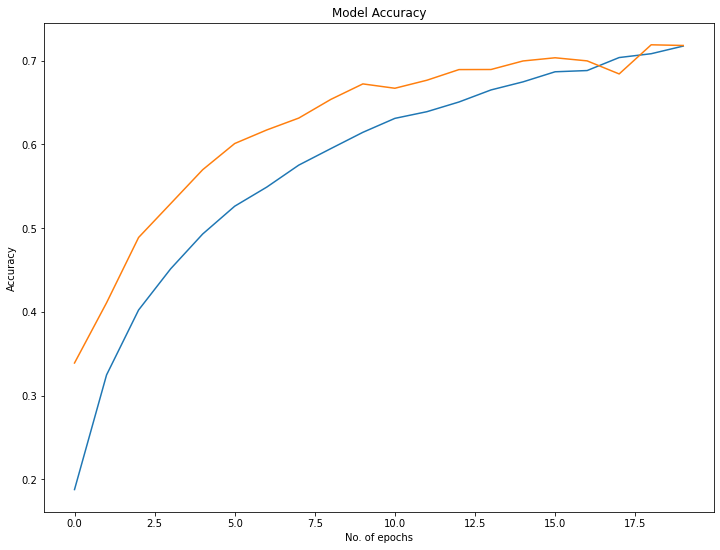

In [210]:
# summarize history for an accuracy

plt.figure(figsize=(12, 9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.show()

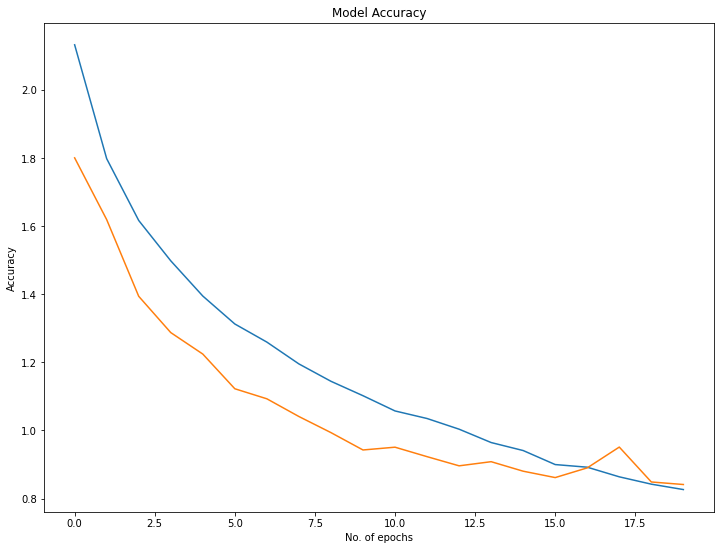

In [211]:
# summarize history for an accuracy

plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of epochs')
plt.show()

In [212]:
y_pred = (model.predict(x_test) > 0.5)*1

313/313 [==============================] - 1s 3ms/step


In [213]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [214]:
# Confusion Matrix

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm


array([[842,  16,  53,   0,   6,   0,   4,   5,  65,   9],
       [111, 824,   0,   1,   0,   2,   4,   0,  21,  37],
       [347,   1, 476,   4,  59,  34,  62,  13,   4,   0],
       [542,   1,  35, 154,  11, 189,  53,   5,   9,   1],
       [322,   0,  46,   0, 542,   9,  40,  38,   3,   0],
       [322,   1,  23,  46,   9, 577,   3,  18,   1,   0],
       [205,   1,  17,  20,   8,   3, 745,   1,   0,   0],
       [248,   0,  12,   1,  37,  54,   3, 645,   0,   0],
       [184,  10,   8,   5,   1,   1,   1,   2, 782,   6],
       [174,  74,   1,   3,   0,   0,   3,  10,  17, 718]])

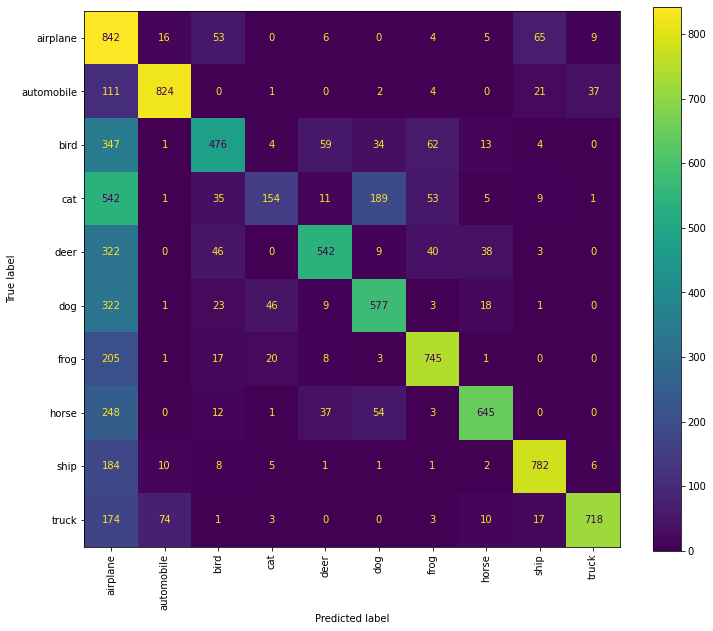

In [215]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(12, 10))
disp = disp.plot(xticks_rotation="vertical", ax= ax)
plt.show()

In [216]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73      1000
           1       0.89      0.82      0.85      1000
           2       0.71      0.48      0.57      1000
           3       0.66      0.15      0.25      1000
           4       0.81      0.54      0.65      1000
           5       0.66      0.58      0.62      1000
           6       0.81      0.74      0.78      1000
           7       0.88      0.65      0.74      1000
           8       0.87      0.78      0.82      1000
           9       0.93      0.72      0.81      1000

   micro avg       0.82      0.61      0.70     10000
   macro avg       0.80      0.61      0.68     10000
weighted avg       0.80      0.61      0.68     10000
 samples avg       0.61      0.61      0.61     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
